# Collaboration and Competition

---

This notebook runs John's solution for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.  It uses the Unity ML-Agents environment to train two cooperative agents to play a tennis-like game.

**Need more description here - refer to readme?**






...


This code depends upon a custom Unity environment provided by the Udacity staff that embodies the variation on tennis.  It will open a separate Unity window for visualizing the environment as the agents train or play.


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from train import train
from maddpg import Maddpg

%matplotlib inline

# create a new Unity environment
# it needs to be done once, outside any loop, as closing an environment then restarting causes
# a Unity exception about the handle no longer being active.
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64", seed=0, 
                       no_graphics=True)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]                       
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## Train the agents

The next cells will invoke the training program to create the agents.  All of the real code is in Python flat files in this project directory.

In [2]:
def class RandomSampler():
    
    def __init__(self, vars):
        """Accepts definition of the set of variables to be sampled.
            
            Params:
                vars (list of lists): each item is a list containing:
                                        item 0 - either 'discrete', 'continuous-int' or 'continuous-float'
                                        items 1-N depend on the value of item 0:
                                        if discrete, then these are the set of values to be chosen from
                                        if continuous then these are the min & max bounds of the range
        """
        
        self.vars = vars
        
        self.rng = np.random.default_rng()
    
    
    def sample(self):
        """Draws a random sample of all variables at its disposal.
        
            Returns a list of values in the order of definition.
        """

        rtn = []
        for v in self.vars:
            if v[0] == "discrete":
                choice = self.rng.integers(low=1, high=len(v), size=1)
                rtn.append(v[choice])
                
            elsif v[0] == "continuous-int":
                choice = self.rng.integers(low=v[1], high=v[2], size=1)
                rtn.append(choice)
                
            elsif v[0] == "continuous-float":
                choice = self.rng.random() * (v[2]-v[1]) + v[1]
                rtn.append(choice)
            
        return rtn
                
vars = [["discrete", 8, 66, 4],
        ["discrete", 5, 3]
       ]
rs = RandomSampler(vars)

for i in range(5):
    out = rs.sample()
    print("\n", i, "\n", out)


Ready to train E25 over 48 training sets for 30001 episodes each, with fixed params:
    Max episodes  =  30001
    Batch size    =  1000
    Bad step prob =  0.01
    Noise decay   =  1.0
    Noise scale   =  0.001
    Weight decay  =  1e-05
    Gamma         =  0.99

///// Beginning training set  E25.01  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.0005
      Seed             =  111
5000	Average score:   0.001,        mem:   1983/   111 ( 5.6%), avg 1384.3 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2730/   113 ( 4.1%), avg 1521.9 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3465/   113 ( 3.3%), avg 1590.8 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4177/   113 ( 2.7%), avg 1638.4 eps/min;  0.1 hr rem   
25000	Average score:   0.004,        mem:   5009/   139 ( 2.8%), avg 1630.0 eps/min;  0.

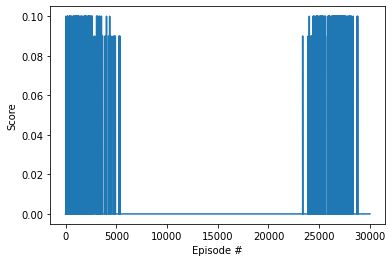


///// Beginning training set  E25.02  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.0005
      Seed             =  44939
5000	Average score:   0.000,        mem:   1799/    33 ( 1.8%), avg 1392.1 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2632/    40 ( 1.5%), avg 1435.0 eps/min;  0.2 hr rem   
15000	Average score:   0.001,        mem:   3509/    65 ( 1.9%), avg 1446.2 eps/min;  0.2 hr rem   
20000	Average score:   0.002,        mem:   4504/   202 ( 4.5%), avg 1435.3 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5250/   227 ( 4.3%), avg 1429.8 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5981/   227 ( 3.8%), avg 1427.9 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 15.4/51


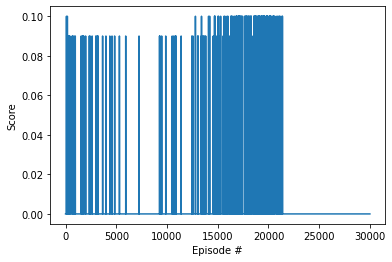


///// Beginning training set  E25.03  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.001
      Seed             =  111
5000	Average score:   0.006,        mem:   2071/   269 (13.0%), avg 1066.4 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   3047/   407 (13.4%), avg 1144.4 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3782/   418 (11.1%), avg 1214.2 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4492/   418 ( 9.3%), avg 1254.6 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5223/   418 ( 8.0%), avg 1290.1 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5916/   418 ( 7.1%), avg 1311.2 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.4/56


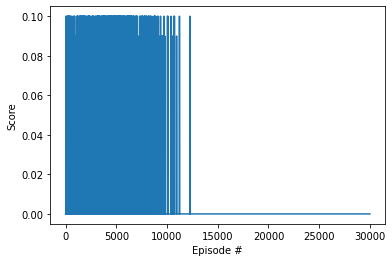


///// Beginning training set  E25.04  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.001
      Seed             =  44939
5000	Average score:   0.000,        mem:   1697/    59 ( 3.5%), avg 1387.1 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2343/    59 ( 2.5%), avg 1395.4 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3092/    59 ( 1.9%), avg 1391.8 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3886/    61 ( 1.6%), avg 1364.0 eps/min;  0.1 hr rem   
25000	Average score:   0.001,        mem:   4729/    94 ( 2.0%), avg 1336.4 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5513/   148 ( 2.7%), avg 1342.7 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.3/49


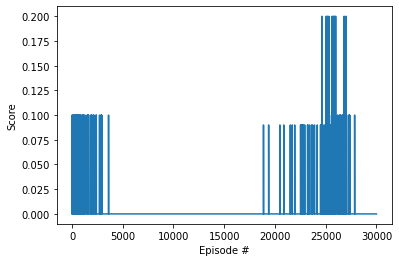


///// Beginning training set  E25.05  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.002
      Seed             =  111
5000	Average score:   0.007,        mem:   2175/   414 (19.0%), avg 1124.3 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   3096/   518 (16.7%), avg 1188.1 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3799/   518 (13.6%), avg 1261.3 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4473/   518 (11.6%), avg 1293.6 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5194/   518 (10.0%), avg 1320.3 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5900/   518 ( 8.8%), avg 1329.3 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.3/67


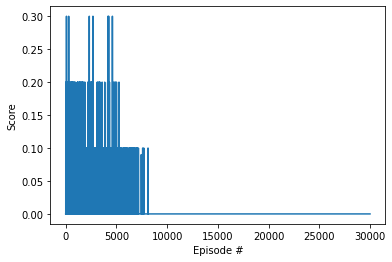


///// Beginning training set  E25.06  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.002
      Seed             =  44939
5000	Average score:   0.008,        mem:   2030/   199 ( 9.8%), avg 1108.6 eps/min;  0.4 hr rem   
10000	Average score:   0.005,        mem:   3122/   475 (15.2%), avg 1157.4 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3833/   480 (12.5%), avg 1234.9 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4558/   480 (10.5%), avg 1276.9 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5252/   480 ( 9.1%), avg 1302.6 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5976/   480 ( 8.0%), avg 1316.4 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.4/107


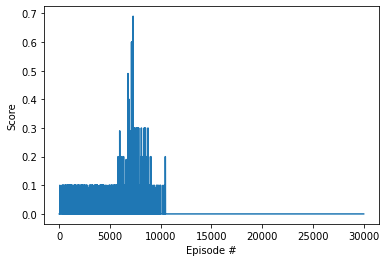


///// Beginning training set  E25.07  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.0005
      Seed             =  111
5000	Average score:   0.000,        mem:   1781/   143 ( 8.0%), avg 1304.8 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2483/   143 ( 5.8%), avg 1368.0 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3207/   143 ( 4.5%), avg 1384.5 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3913/   143 ( 3.7%), avg 1393.4 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4652/   143 ( 3.1%), avg 1393.1 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5382/   143 ( 2.7%), avg 1391.4 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.5/73


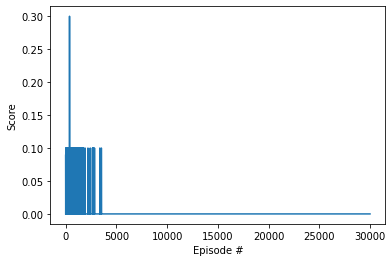


///// Beginning training set  E25.08  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.0005
      Seed             =  44939
5000	Average score:   0.000,        mem:   1845/    80 ( 4.3%), avg 1166.0 eps/min;  0.4 hr rem   
10000	Average score:   0.003,        mem:   2780/   223 ( 8.0%), avg 1202.8 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3504/   230 ( 6.6%), avg 1270.9 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4268/   230 ( 5.4%), avg 1306.5 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4966/   230 ( 4.6%), avg 1329.5 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5679/   230 ( 4.1%), avg 1343.1 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.2/50


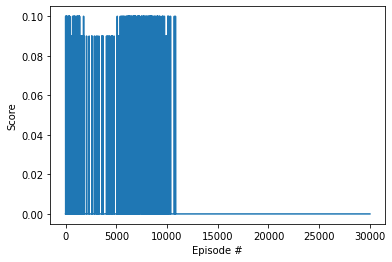


///// Beginning training set  E25.09  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.001
      Seed             =  111
5000	Average score:   0.000,        mem:   1827/   107 ( 5.9%), avg 1263.1 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2545/   107 ( 4.2%), avg 1328.0 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3273/   107 ( 3.3%), avg 1357.5 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3971/   107 ( 2.7%), avg 1364.4 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4669/   107 ( 2.3%), avg 1370.8 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5435/   123 ( 2.3%), avg 1365.7 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.7/54


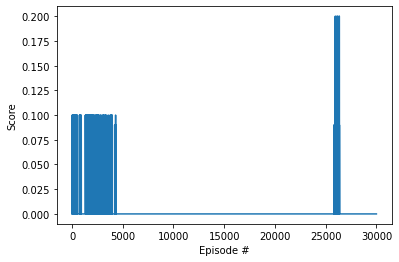


///// Beginning training set  E25.10  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.001
      Seed             =  44939
5000	Average score:   0.003,        mem:   1807/    81 ( 4.5%), avg 1127.9 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   2565/   123 ( 4.8%), avg 1236.9 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3325/   123 ( 3.7%), avg 1287.3 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4023/   123 ( 3.1%), avg 1313.1 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4773/   123 ( 2.6%), avg 1334.7 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5456/   123 ( 2.3%), avg 1345.2 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.7/50


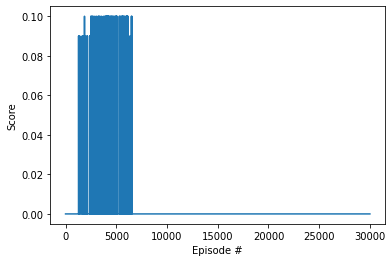


///// Beginning training set  E25.11  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.002
      Seed             =  111
5000	Average score:   0.000,        mem:   1808/   154 ( 8.5%), avg 1227.9 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2534/   154 ( 6.1%), avg 1313.8 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3271/   154 ( 4.7%), avg 1342.5 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3946/   154 ( 3.9%), avg 1350.3 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4690/   154 ( 3.3%), avg 1362.0 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5445/   154 ( 2.8%), avg 1364.1 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.6/51


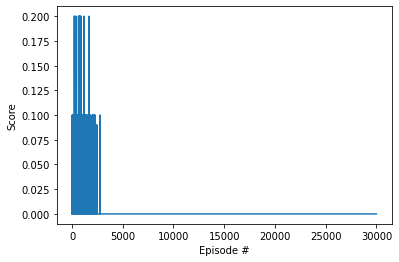


///// Beginning training set  E25.12  with:
      LR actor         =  0.0001
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.002
      Seed             =  44939
5000	Average score:   0.000,        mem:   1797/   135 ( 7.5%), avg 1323.8 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2490/   135 ( 5.4%), avg 1379.1 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3162/   135 ( 4.3%), avg 1378.0 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3873/   135 ( 3.5%), avg 1385.8 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4598/   135 ( 2.9%), avg 1361.8 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5383/   135 ( 2.5%), avg 1368.9 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.4/41


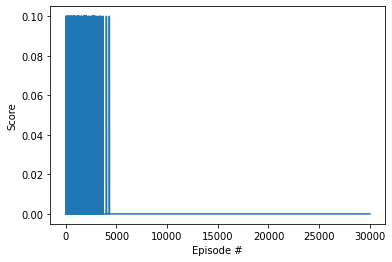


///// Beginning training set  E25.13  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.0005
      Seed             =  111
5000	Average score:   0.000,        mem:   1689/     0 ( 0.0%), avg 1334.9 eps/min;  0.3 hr rem   
10000	Average score:   0.001,        mem:   2461/     9 ( 0.4%), avg 1273.6 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3373/   119 ( 3.5%), avg 1224.4 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4061/   119 ( 2.9%), avg 1251.5 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4792/   119 ( 2.5%), avg 1284.6 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5494/   119 ( 2.2%), avg 1300.5 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.0/50


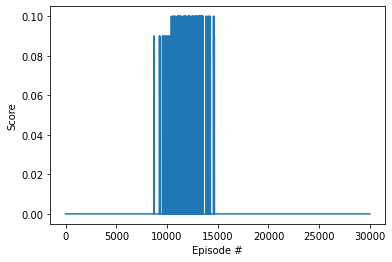


///// Beginning training set  E25.14  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.0005
      Seed             =  44939
5000	Average score:   0.000,        mem:   1852/    41 ( 2.2%), avg 1176.0 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   2637/    46 ( 1.7%), avg 1238.2 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3355/    46 ( 1.4%), avg 1296.5 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4040/    46 ( 1.1%), avg 1329.6 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4768/    46 ( 1.0%), avg 1350.3 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5517/    46 ( 0.8%), avg 1362.6 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.0/50


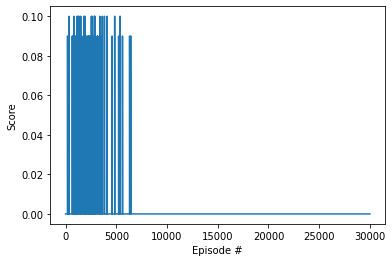


///// Beginning training set  E25.15  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.001
      Seed             =  111
5000	Average score:   0.001,        mem:   1764/   176 (10.0%), avg 1331.3 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2491/   177 ( 7.1%), avg 1378.7 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3196/   177 ( 5.5%), avg 1390.3 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3920/   177 ( 4.5%), avg 1400.0 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4593/   177 ( 3.9%), avg 1402.9 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5277/   177 ( 3.4%), avg 1409.6 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.4/69


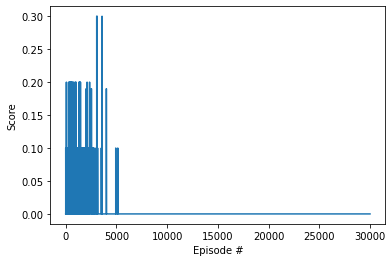


///// Beginning training set  E25.16  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.001
      Seed             =  44939
5000	Average score:   0.005,        mem:   2123/   240 (11.3%), avg 1065.7 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   3304/   571 (17.3%), avg 1147.6 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   4054/   596 (14.7%), avg 1221.6 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4751/   596 (12.5%), avg 1273.7 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5438/   596 (11.0%), avg 1306.9 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   6156/   596 ( 9.7%), avg 1329.5 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.6/75


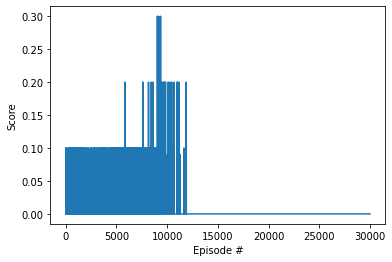


///// Beginning training set  E25.17  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.002
      Seed             =  111
5000	Average score:   0.005,        mem:   2147/   408 (19.0%), avg 1152.9 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   2980/   463 (15.5%), avg 1262.9 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3689/   465 (12.6%), avg 1312.6 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4412/   465 (10.5%), avg 1343.3 eps/min;  0.1 hr rem   
25000	Average score:   0.006,        mem:   5180/   501 ( 9.7%), avg 1343.0 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   6031/   556 ( 9.2%), avg 1335.3 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.2/81


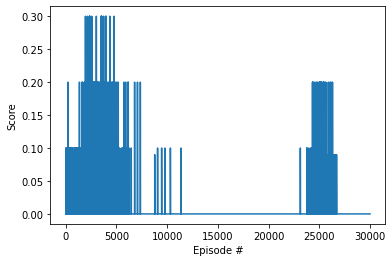


///// Beginning training set  E25.18  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.002
      Seed             =  44939
5000	Average score:   0.001,        mem:   1864/   129 ( 6.9%), avg 1215.2 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2705/   148 ( 5.5%), avg 1255.6 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3410/   148 ( 4.3%), avg 1311.8 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4129/   148 ( 3.6%), avg 1344.1 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4872/   148 ( 3.0%), avg 1360.5 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5555/   148 ( 2.7%), avg 1371.0 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.0/46


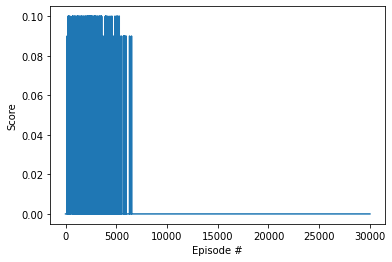


///// Beginning training set  E25.19  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.0005
      Seed             =  111
5000	Average score:   0.004,        mem:   1885/   203 (10.8%), avg 1161.1 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   2615/   224 ( 8.6%), avg 1278.7 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3324/   224 ( 6.7%), avg 1325.0 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4024/   224 ( 5.6%), avg 1354.4 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4715/   224 ( 4.8%), avg 1371.4 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5400/   224 ( 4.1%), avg 1378.6 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.7/72


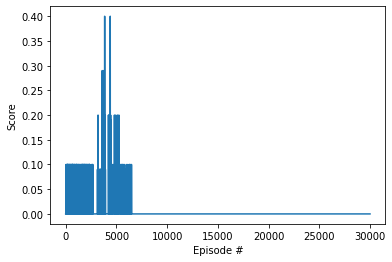


///// Beginning training set  E25.20  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.0005
      Seed             =  44939
5000	Average score:   0.000,        mem:   1985/   200 (10.1%), avg 1119.6 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   2693/   200 ( 7.4%), avg 1263.4 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3379/   200 ( 5.9%), avg 1305.8 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4098/   200 ( 4.9%), avg 1333.1 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4805/   200 ( 4.2%), avg 1351.3 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5515/   200 ( 3.6%), avg 1362.6 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.9/63


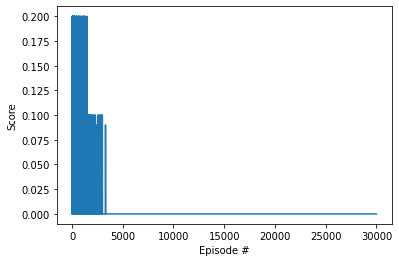


///// Beginning training set  E25.21  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.001
      Seed             =  111
5000	Average score:   0.000,        mem:   1680/     2 ( 0.1%), avg 1306.0 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2406/     2 ( 0.1%), avg 1358.5 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3160/     2 ( 0.1%), avg 1381.4 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3856/     2 ( 0.1%), avg 1395.6 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4592/     2 ( 0.0%), avg 1394.4 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5270/     2 ( 0.0%), avg 1397.0 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.5/57


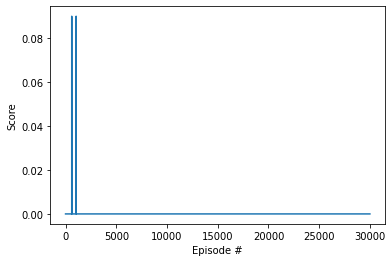


///// Beginning training set  E25.22  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.001
      Seed             =  44939
5000	Average score:   0.000,        mem:   1750/    88 ( 5.0%), avg 1300.4 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2425/    88 ( 3.6%), avg 1364.6 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3134/    88 ( 2.8%), avg 1385.8 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3848/    88 ( 2.3%), avg 1389.8 eps/min;  0.1 hr rem   
25000	Average score:   0.006,        mem:   4818/   280 ( 5.8%), avg 1360.9 eps/min;  0.1 hr rem   
30000	Average score:   0.001,        mem:   5782/   484 ( 8.4%), avg 1352.2 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.0/55


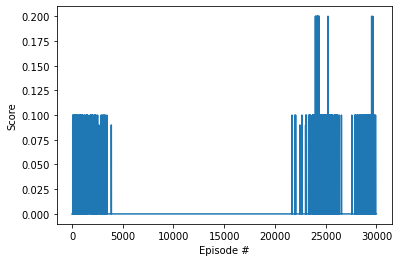


///// Beginning training set  E25.23  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.002
      Seed             =  111
5000	Average score:   0.000,        mem:   1746/    73 ( 4.2%), avg 1341.4 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2484/    73 ( 2.9%), avg 1342.8 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3174/    73 ( 2.3%), avg 1365.7 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3900/    73 ( 1.9%), avg 1381.6 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4738/   144 ( 3.0%), avg 1369.7 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5408/   144 ( 2.7%), avg 1379.4 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.6/57


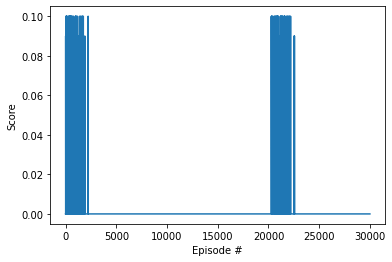


///// Beginning training set  E25.24  with:
      LR actor         =  0.0001
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.002
      Seed             =  44939
5000	Average score:   0.000,        mem:   1914/   239 (12.5%), avg 1228.9 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2628/   239 ( 9.1%), avg 1327.6 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3366/   239 ( 7.1%), avg 1353.0 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4075/   239 ( 5.9%), avg 1359.1 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4806/   239 ( 5.0%), avg 1367.5 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5544/   239 ( 4.3%), avg 1378.0 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.6/62


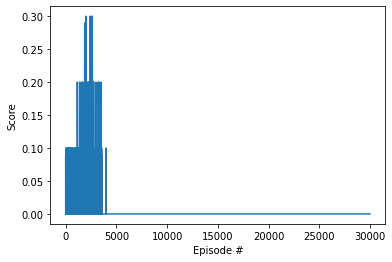


///// Beginning training set  E25.25  with:
      LR actor         =  5e-05
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.0005
      Seed             =  111
5000	Average score:   0.001,        mem:   1795/    93 ( 5.2%), avg 1164.9 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   2666/   116 ( 4.4%), avg 1165.3 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3628/   136 ( 3.7%), avg 1166.1 eps/min;  0.2 hr rem   
20000	Average score:   0.005,        mem:   4566/   257 ( 5.6%), avg 1171.7 eps/min;  0.1 hr rem   
25000	Average score:   0.005,        mem:   5448/   434 ( 8.0%), avg 1191.0 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   6170/   445 ( 7.2%), avg 1221.1 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 15.7/50


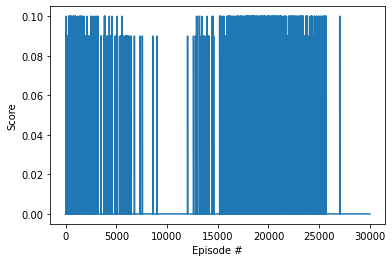


///// Beginning training set  E25.26  with:
      LR actor         =  5e-05
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.0005
      Seed             =  44939
5000	Average score:   0.008,        mem:   2189/   364 (16.6%), avg 1079.6 eps/min;  0.4 hr rem   
10000	Average score:   0.006,        mem:   3531/   721 (20.4%), avg 1067.7 eps/min;  0.3 hr rem   
15000	Average score:   0.002,        mem:   4507/   873 (19.4%), avg 1115.2 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   5277/   876 (16.6%), avg 1174.2 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5958/   876 (14.7%), avg 1221.4 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   6700/   876 (13.1%), avg 1253.9 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 15.4/91


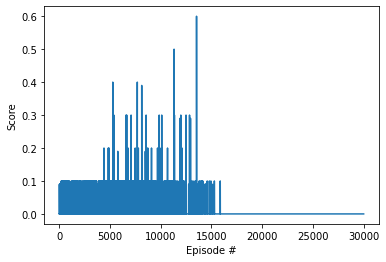


///// Beginning training set  E25.27  with:
      LR actor         =  5e-05
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.001
      Seed             =  111
5000	Average score:   0.011,        mem:   2168/   459 (21.2%), avg 1153.1 eps/min;  0.4 hr rem   
10000	Average score:   0.005,        mem:   3421/   827 (24.2%), avg 1186.2 eps/min;  0.3 hr rem   
15000	Average score:   0.005,        mem:   4546/  1062 (23.4%), avg 1191.9 eps/min;  0.2 hr rem   
20000	Average score:   0.010,        mem:   5695/  1334 (23.4%), avg 1193.0 eps/min;  0.1 hr rem   
25000	Average score:   0.002,        mem:   6764/  1625 (24.0%), avg 1219.6 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   7460/  1638 (22.0%), avg 1247.6 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 15.5/75


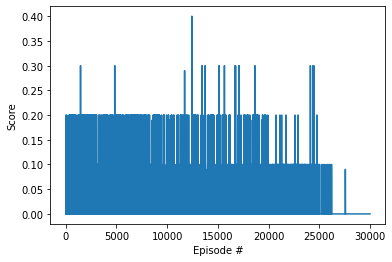


///// Beginning training set  E25.28  with:
      LR actor         =  5e-05
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.001
      Seed             =  44939
5000	Average score:   0.003,        mem:   1877/    67 ( 3.6%), avg 1060.1 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   2665/    75 ( 2.8%), avg 1095.4 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3383/    75 ( 2.2%), avg 1154.9 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4102/    75 ( 1.8%), avg 1198.8 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4781/    75 ( 1.6%), avg 1232.3 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5468/    75 ( 1.4%), avg 1253.7 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.2/50


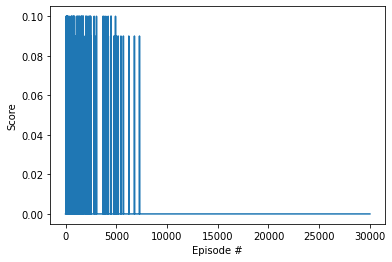


///// Beginning training set  E25.29  with:
      LR actor         =  5e-05
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.002
      Seed             =  111
5000	Average score:   0.005,        mem:   1813/   118 ( 6.5%), avg 1240.4 eps/min;  0.3 hr rem   
10000	Average score:   0.001,        mem:   2728/   257 ( 9.4%), avg 1264.2 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3531/   343 ( 9.7%), avg 1298.4 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4250/   352 ( 8.3%), avg 1322.7 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4989/   352 ( 7.1%), avg 1341.5 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5716/   352 ( 6.2%), avg 1354.8 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.9/49


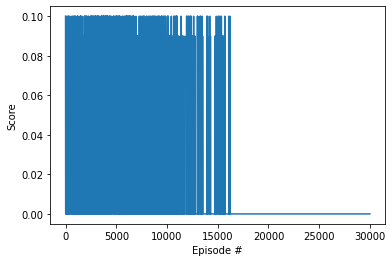


///// Beginning training set  E25.30  with:
      LR actor         =  5e-05
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.002
      Seed             =  44939
5000	Average score:   0.000,        mem:   1687/    59 ( 3.5%), avg 1317.3 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2490/    66 ( 2.7%), avg 1293.0 eps/min;  0.3 hr rem   
15000	Average score:   0.005,        mem:   3393/   133 ( 3.9%), avg 1259.6 eps/min;  0.2 hr rem   
20000	Average score:   0.005,        mem:   4548/   387 ( 8.5%), avg 1231.9 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5446/   511 ( 9.4%), avg 1252.1 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   6170/   511 ( 8.3%), avg 1274.5 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.8/63


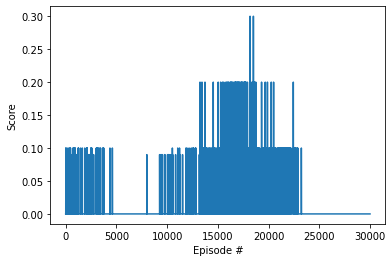


///// Beginning training set  E25.31  with:
      LR actor         =  5e-05
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.0005
      Seed             =  111
5000	Average score:   0.000,        mem:   1728/    20 ( 1.2%), avg 1205.8 eps/min;  0.3 hr rem   
10000	Average score:   0.001,        mem:   2612/    70 ( 2.7%), avg 1196.3 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3448/   141 ( 4.1%), avg 1233.1 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4157/   141 ( 3.4%), avg 1273.7 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4848/   141 ( 2.9%), avg 1301.7 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5535/   141 ( 2.5%), avg 1316.9 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.3/50


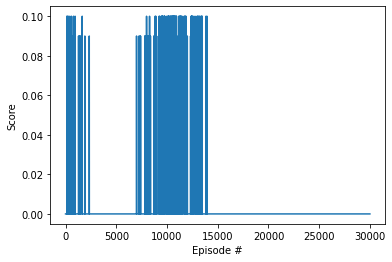


///// Beginning training set  E25.32  with:
      LR actor         =  5e-05
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.0005
      Seed             =  44939
5000	Average score:   0.000,        mem:   1823/    37 ( 2.0%), avg 1148.9 eps/min;  0.4 hr rem   
10000	Average score:   0.001,        mem:   2733/    87 ( 3.2%), avg 1167.7 eps/min;  0.3 hr rem   
15000	Average score:   0.002,        mem:   3637/   200 ( 5.5%), avg 1201.2 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4394/   231 ( 5.3%), avg 1245.4 eps/min;  0.1 hr rem   
25000	Average score:   0.001,        mem:   5131/   251 ( 4.9%), avg 1268.9 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   6066/   463 ( 7.6%), avg 1280.3 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.9/50


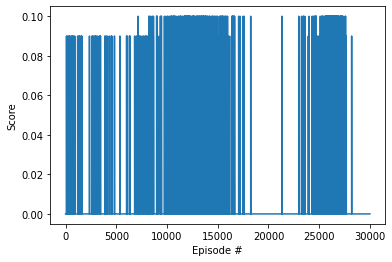


///// Beginning training set  E25.33  with:
      LR actor         =  5e-05
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.001
      Seed             =  111
5000	Average score:   0.002,        mem:   1793/    31 ( 1.7%), avg 1152.4 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   2945/   294 (10.0%), avg 1142.1 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3645/   295 ( 8.1%), avg 1216.7 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4365/   295 ( 6.8%), avg 1263.4 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5064/   295 ( 5.8%), avg 1294.6 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5715/   295 ( 5.2%), avg 1316.9 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.4/81


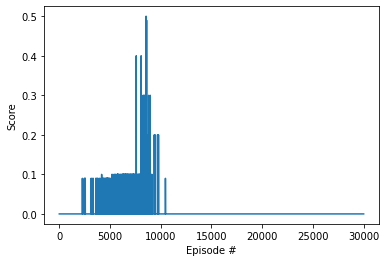


///// Beginning training set  E25.34  with:
      LR actor         =  5e-05
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.001
      Seed             =  44939
5000	Average score:   0.003,        mem:   1980/   153 ( 7.7%), avg 1048.3 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   3028/   373 (12.3%), avg 1038.3 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3767/   398 (10.6%), avg 1140.4 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4505/   398 ( 8.8%), avg 1205.7 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5221/   398 ( 7.6%), avg 1240.1 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5925/   398 ( 6.7%), avg 1270.5 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.5/50


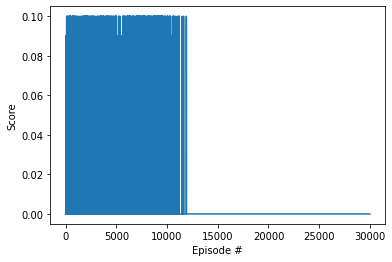


///// Beginning training set  E25.35  with:
      LR actor         =  5e-05
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.002
      Seed             =  111
5000	Average score:   0.000,        mem:   1776/    62 ( 3.5%), avg 1199.5 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2583/    81 ( 3.1%), avg 1230.3 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3338/    81 ( 2.4%), avg 1264.5 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4043/    81 ( 2.0%), avg 1303.0 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4755/    81 ( 1.7%), avg 1326.5 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5490/    81 ( 1.5%), avg 1346.2 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.2/57


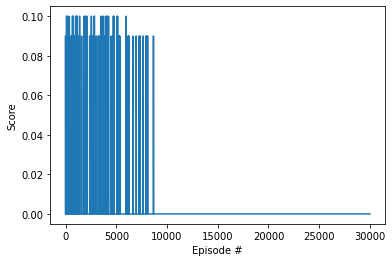


///// Beginning training set  E25.36  with:
      LR actor         =  5e-05
      LR critic        =  0.0001
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.002
      Seed             =  44939
5000	Average score:   0.005,        mem:   1970/   178 ( 9.0%), avg 1062.2 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   3055/   436 (14.3%), avg 1162.3 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3739/   436 (11.7%), avg 1244.9 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4493/   436 ( 9.7%), avg 1287.0 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5209/   436 ( 8.4%), avg 1311.0 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5914/   436 ( 7.4%), avg 1327.4 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.2/75


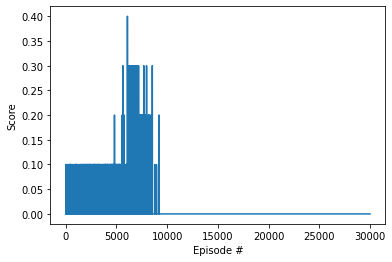


///// Beginning training set  E25.37  with:
      LR actor         =  5e-05
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.0005
      Seed             =  111
5000	Average score:   0.000,        mem:   2231/   369 (16.5%), avg 1062.0 eps/min;  0.4 hr rem   
10000	Average score:   0.000,        mem:   3277/   482 (14.7%), avg 1071.7 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   4156/   494 (11.9%), avg 1120.9 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4901/   494 (10.1%), avg 1188.1 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5613/   494 ( 8.8%), avg 1231.9 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   6295/   494 ( 7.8%), avg 1263.2 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 15.4/81


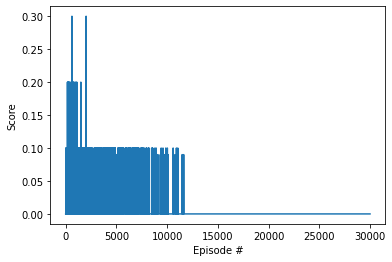


///// Beginning training set  E25.38  with:
      LR actor         =  5e-05
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.0005
      Seed             =  44939
5000	Average score:   0.003,        mem:   1937/   164 ( 8.5%), avg 1136.0 eps/min;  0.4 hr rem   
10000	Average score:   0.001,        mem:   2921/   299 (10.2%), avg 1170.2 eps/min;  0.3 hr rem   
15000	Average score:   0.001,        mem:   3779/   394 (10.4%), avg 1203.4 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4538/   395 ( 8.7%), avg 1236.2 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5306/   395 ( 7.4%), avg 1252.7 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   6051/   395 ( 6.5%), avg 1271.6 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 15.1/57


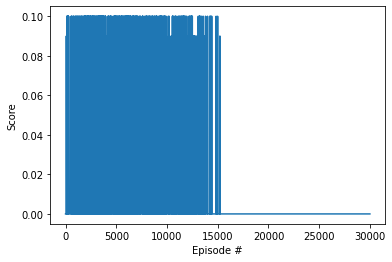


///// Beginning training set  E25.39  with:
      LR actor         =  5e-05
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.001
      Seed             =  111
5000	Average score:   0.005,        mem:   2069/   197 ( 9.5%), avg 1083.2 eps/min;  0.4 hr rem   
10000	Average score:   0.003,        mem:   3228/   407 (12.6%), avg 1070.2 eps/min;  0.3 hr rem   
15000	Average score:   0.001,        mem:   4233/   606 (14.3%), avg 1135.1 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4938/   619 (12.5%), avg 1196.5 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5685/   619 (10.9%), avg 1241.8 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   6389/   619 ( 9.7%), avg 1276.4 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 15.3/74


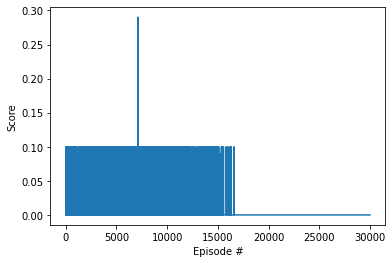


///// Beginning training set  E25.40  with:
      LR actor         =  5e-05
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.001
      Seed             =  44939
5000	Average score:   0.007,        mem:   1998/   163 ( 8.2%), avg 1237.6 eps/min;  0.3 hr rem   
10000	Average score:   0.004,        mem:   2946/   330 (11.2%), avg 1300.9 eps/min;  0.3 hr rem   
15000	Average score:   0.002,        mem:   3907/   496 (12.7%), avg 1358.6 eps/min;  0.2 hr rem   
20000	Average score:   0.001,        mem:   4872/   602 (12.4%), avg 1383.3 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5661/   617 (10.9%), avg 1420.8 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   6395/   617 ( 9.6%), avg 1468.6 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 15.6/54


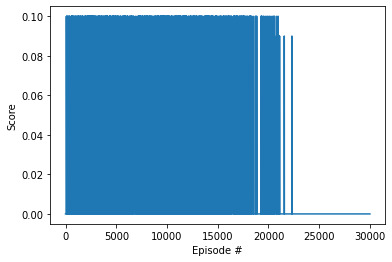


///// Beginning training set  E25.41  with:
      LR actor         =  5e-05
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.002
      Seed             =  111
5000	Average score:   0.005,        mem:   2064/   261 (12.6%), avg 1301.5 eps/min;  0.3 hr rem   
10000	Average score:   0.005,        mem:   3304/   518 (15.7%), avg 1254.7 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   4281/   647 (15.1%), avg 1297.2 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   5016/   647 (12.9%), avg 1377.7 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5759/   647 (11.2%), avg 1438.3 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   6474/   647 (10.0%), avg 1486.3 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 15.7/51


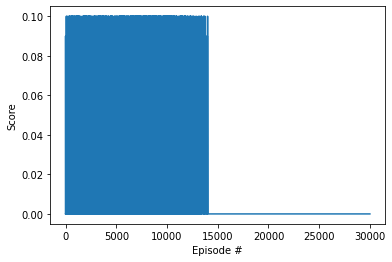


///// Beginning training set  E25.42  with:
      LR actor         =  5e-05
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  1
      Tau              =  0.002
      Seed             =  44939
5000	Average score:   0.011,        mem:   2085/   269 (12.9%), avg 1427.5 eps/min;  0.3 hr rem   
10000	Average score:   0.008,        mem:   3336/   588 (17.6%), avg 1386.5 eps/min;  0.2 hr rem   
15000	Average score:   0.002,        mem:   4438/   746 (16.8%), avg 1372.0 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   5280/   761 (14.4%), avg 1402.3 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   6022/   761 (12.6%), avg 1427.5 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   6853/   761 (11.1%), avg 1437.1 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 16.3/63


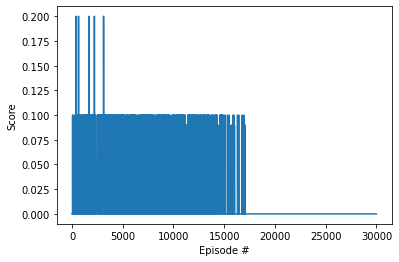


///// Beginning training set  E25.43  with:
      LR actor         =  5e-05
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.0005
      Seed             =  111
5000	Average score:   0.001,        mem:   1907/   204 (10.7%), avg 1448.8 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2652/   216 ( 8.1%), avg 1531.3 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3381/   216 ( 6.4%), avg 1542.8 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4096/   216 ( 5.3%), avg 1559.0 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4823/   216 ( 4.5%), avg 1576.7 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5515/   216 ( 3.9%), avg 1582.9 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.6/52


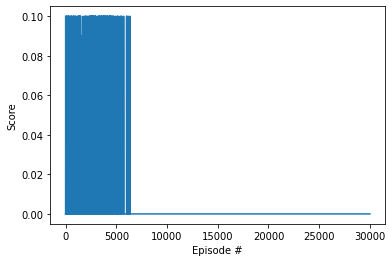


///// Beginning training set  E25.44  with:
      LR actor         =  5e-05
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.0005
      Seed             =  44939
5000	Average score:   0.003,        mem:   1939/   101 ( 5.2%), avg 1258.8 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2975/   331 (11.1%), avg 1302.7 eps/min;  0.3 hr rem   
15000	Average score:   0.000,        mem:   3682/   331 ( 9.0%), avg 1387.3 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4439/   331 ( 7.5%), avg 1444.9 eps/min;  0.1 hr rem   
25000	Average score:   0.003,        mem:   5322/   465 ( 8.7%), avg 1433.1 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   6088/   471 ( 7.7%), avg 1433.6 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.8/85


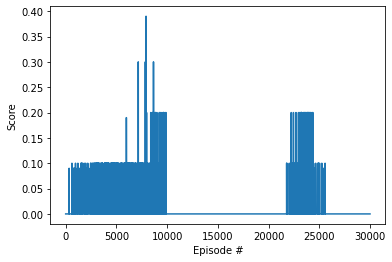


///// Beginning training set  E25.45  with:
      LR actor         =  5e-05
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.001
      Seed             =  111
5000	Average score:   0.004,        mem:   1807/   195 (10.8%), avg 1515.9 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2555/   200 ( 7.8%), avg 1523.8 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3266/   200 ( 6.1%), avg 1593.1 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   3980/   200 ( 5.0%), avg 1629.3 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4693/   200 ( 4.3%), avg 1647.8 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5417/   200 ( 3.7%), avg 1657.0 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 13.5/61


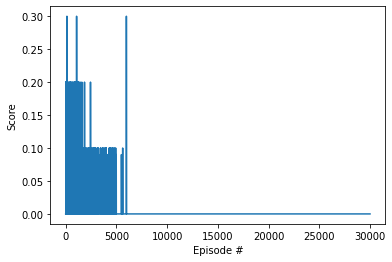


///// Beginning training set  E25.46  with:
      LR actor         =  5e-05
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.001
      Seed             =  44939
5000	Average score:   0.002,        mem:   1883/   118 ( 6.3%), avg 1460.6 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2735/   153 ( 5.6%), avg 1492.6 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3524/   153 ( 4.3%), avg 1566.0 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4217/   153 ( 3.6%), avg 1616.0 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4901/   153 ( 3.1%), avg 1645.1 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5588/   153 ( 2.7%), avg 1655.4 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.2/62


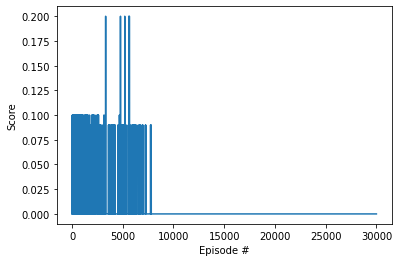


///// Beginning training set  E25.47  with:
      LR actor         =  5e-05
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.002
      Seed             =  111
5000	Average score:   0.002,        mem:   1934/    71 ( 3.7%), avg 1380.5 eps/min;  0.3 hr rem   
10000	Average score:   0.007,        mem:   3045/   303 (10.0%), avg 1374.2 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3998/   463 (11.6%), avg 1446.3 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4711/   463 ( 9.8%), avg 1509.3 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   5398/   463 ( 8.6%), avg 1554.1 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   6104/   463 ( 7.6%), avg 1586.7 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.8/70


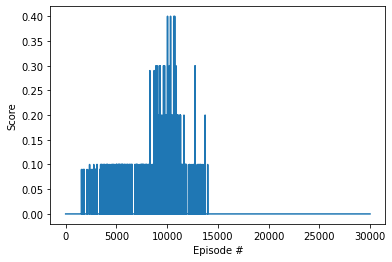


///// Beginning training set  E25.48  with:
      LR actor         =  5e-05
      LR critic        =  5e-05
      Learning every      100  time steps
      Learn iterations =  2
      Tau              =  0.002
      Seed             =  44939
5000	Average score:   0.010,        mem:   1849/   229 (12.4%), avg 1640.1 eps/min;  0.3 hr rem   
10000	Average score:   0.000,        mem:   2896/   432 (14.9%), avg 1518.0 eps/min;  0.2 hr rem   
15000	Average score:   0.000,        mem:   3584/   433 (12.1%), avg 1474.4 eps/min;  0.2 hr rem   
20000	Average score:   0.000,        mem:   4250/   433 (10.2%), avg 1459.0 eps/min;  0.1 hr rem   
25000	Average score:   0.000,        mem:   4903/   433 ( 8.8%), avg 1455.4 eps/min;  0.1 hr rem   
30000	Average score:   0.000,        mem:   5581/   433 ( 7.8%), avg 1450.5 eps/min;  0.0 hr rem   

Avg/max time steps/episode = 14.0/62


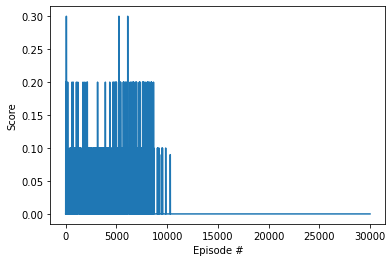



DONE!


In [3]:
# This cell will explore several combinations of hyperparams by training all of them

EXPLORE = True

TIME_STEPS         = 200
SAVE_ANALYSIS      = False
MODEL_DISPLAY_STEP = 0 #200k is approx 10k episodes at bad_step_prob = 0.01

if EXPLORE:
    
    # fixed for the session:
    RUN_PREFIX     = "E25"
    EPISODES       = 30001
    BATCH          = 1000
    BAD_STEP_PROB  = 0.01
    NOISE_DECAY    = 1.0 #need to test 0.99999; 0.9999 is too small
    NOISE_SCALE    = 0.001
    WEIGHT_DECAY   = 1.0e-5
    GAMMA          = 0.99
    
    # session loop variables:
    SEEDS          = (111, 44939) #(0, 111, 468, 5555, 23100, 44939)
    LR_ACTORS      = (0.0001, 0.00005)
    LR_CRITICS     = (0.0001, 0.00005)
    LEARN_EVERYS   = (100,)
    LEARN_ITERS    = (1, 2)
    TAUS           = (0.0005, 0.001, 0.002)
    
    
    num_sets = len(LR_ACTORS) * len(LR_CRITICS) * len(SEEDS) * len(LEARN_EVERYS) * len(LEARN_ITERS) * len(TAUS)
    print("Ready to train {} over {} training sets for {} episodes each, with fixed params:"
          .format(RUN_PREFIX, num_sets, EPISODES))
    print("    Max episodes  = ", EPISODES)
    print("    Batch size    = ", BATCH)
    print("    Bad step prob = ", BAD_STEP_PROB)
    print("    Noise decay   = ", NOISE_DECAY)
    print("    Noise scale   = ", NOISE_SCALE)
    print("    Weight decay  = ", WEIGHT_DECAY)
    print("    Gamma         = ", GAMMA)
    
    set_id = 0
    for LR_ACTOR in LR_ACTORS:
        for LR_CRITIC in LR_CRITICS:
            for LEARN_EVERY in LEARN_EVERYS:
                for LEARN_ITER in LEARN_ITERS:
                    for TAU in TAUS:
                        for SEED in SEEDS:

                            # set the replay buffer size to that it fills after ~5000 bad episodes
                            # (at ~14 experiences/episode), based on the bad step retention rate
                            buffer_size = int(60000 - 50000*(1.0 - BAD_STEP_PROB))

                            set_id += 1
                            RUN_NAME = "{}.{:02d}".format(RUN_PREFIX, set_id)
                            print("\n///// Beginning training set ", RUN_NAME, " with:")
                            print("      LR actor         = ", LR_ACTOR)
                            print("      LR critic        = ", LR_CRITIC)
                            print("      Learning every     ", LEARN_EVERY, " time steps")
                            print("      Learn iterations = ", LEARN_ITER)
                            print("      Tau              = ", TAU)
                            print("      Seed             = ", SEED)

                            ##### instantiate the agents and perform the training

                            maddpg = Maddpg(state_size, action_size, 2, bad_step_prob=BAD_STEP_PROB,
                                            random_seed=SEED, batch_size=BATCH, buffer_size=buffer_size,
                                            noise_decay=NOISE_DECAY, learn_every=LEARN_EVERY, 
                                            learn_iter=LEARN_ITER, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC,
                                            weight_decay=WEIGHT_DECAY, gamma=GAMMA, noise_scale=NOISE_SCALE,
                                            tau=TAU, model_display_step=MODEL_DISPLAY_STEP)

                            scores = train(maddpg, env, run_name=RUN_NAME, max_episodes=EPISODES, 
                                           winning_score=0.5, max_time_steps=TIME_STEPS,
                                           checkpoint_interval=5000)

                            ##### plot the training reward history

                            fig = plt.figure()
                            ax = fig.add_subplot(111)
                            plt.plot(np.arange(len(scores)), scores)
                            plt.ylabel('Score')
                            plt.xlabel('Episode #')
                            plt.show()

                            ##### store the action/noise data, if being used

                            if SAVE_ANALYSIS:
                                maddpg.save_anal_data(RUN_PREFIX)

                            
    print("\n\nDONE!")

# HEY JOHN - TODO!

- update main.py to match the above code {ALL CELLS}
- Test running from cmd line (may need a script?)
- Clean up the bottom part of this notebook

In [4]:
# load a pre-trained (or partially trained) model and run it in inference mode to watch it perform



### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
"""
for i in range(10):                                        # play game for several episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations             3     # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    num_steps = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        num_steps += 1
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Episode {}: {:5.3f}, took {} steps'.format(i, np.max(scores), num_steps))
"""

"\nfor i in range(10):                                        # play game for several episodes\n    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \n    states = env_info.vector_observations             3     # get the current state (for each agent)\n    scores = np.zeros(num_agents)                          # initialize the score (for each agent)\n    num_steps = 0\n    while True:\n        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n        env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n        next_states = env_info.vector_observations         # get next state (for each agent)\n        rewards = env_info.rewards                         # get reward (for each agent)\n        dones = env_info.local_done                        # see if episode finished\n        scores += env_i

When finished, you can close the environment.

In [6]:
env.close()